# Regressão não linear

    Se os dados mostrarem uma tendência curvilínea, a regressão linear não produzirá resultados muito precisos quando comparados a uma regressão não linear porque, como o nome indica, a regressão linear pressupõe que os dados são lineares. Vamos aprender sobre regressões não lineares e aplicar um exemplo em python. Neste caderno, ajustamos um modelo não linear aos pontos de dados correspondentes ao PIB da China de 1960 a 2014.

# Imports necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    Embora a regressão linear seja muito boa para resolver muitos problemas, ela não pode ser usada para todos os conjuntos de dados. Primeiro, lembre-se de como a regressão linear pode modelar um conjunto de dados. Ele modela uma relação linear entre uma variável dependente y e a variável independente x.

Text(0.5, 0, 'Variavel Independente')

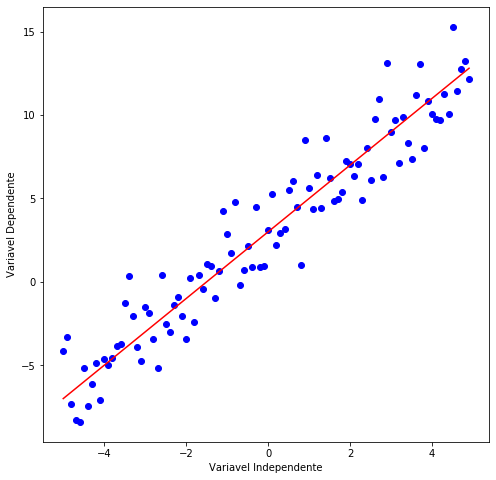

In [3]:
plt.figure(figsize=(8,8))
x = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e interceptar para verificar as alterações no gráfico.
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

    np.arange([ start , ] stop , [ step , ] dtype = None)
    Retorne valores espaçados uniformemente dentro de um determinado intervalo.
    Os valores são gerados dentro do intervalo semiaberto (em outras palavras, o intervalo incluindo início, mas excluindo parada ).

    Regressões não lineares são uma relação entre variáveis independentes 𝑥 e uma variável dependente 𝑦 que resultam em dados modelados de função não linear. Essencialmente, qualquer relação que não seja linear pode ser denominada como não linear e geralmente é representada pelo polinômio de 𝑘 graus (potência máxima de 𝑥).

      𝑦 = 𝑎𝑥3 + 𝑏𝑥2 + 𝑐𝑥 + 𝑑
 
    Funções não lineares podem ter elementos como exponenciais, logaritmos, frações e outros. Por exemplo:
    𝑦 = log (𝑥)
 
    Ou ainda, mais complicado, como:
    𝑦 = log (𝑎𝑥3 + 𝑏𝑥2 + 𝑐𝑥 + 𝑑)
 
    Vamos dar uma olhada no gráfico de uma função cúbica.

Text(0.5, 0, 'Variavel Independente')

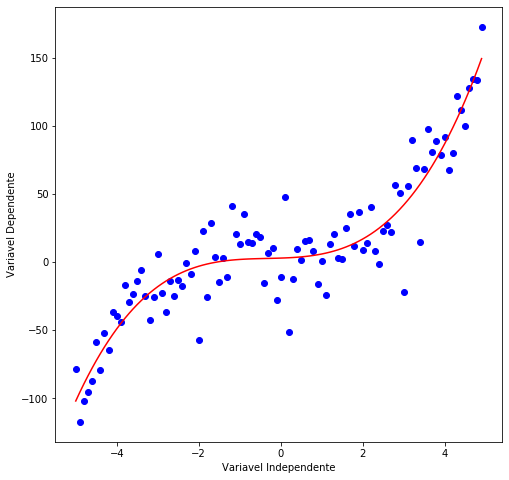

In [6]:
plt.figure(figsize=(8,8))
x = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e interceptar para verificar as alterações no gráfico.
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

    Como você pode ver, esta função tem 𝑥3 e 𝑥2 como variáveis independentes. Além disso, o gráfico desta função não é uma linha reta sobre o plano 2D. Portanto, esta é uma função não linear.

    Alguns outros tipos de funções não lineares são: Quadrática, Exponencial, Logarítmica, Sigmoidal / Logística.

# Quadrática

    𝑌=𝑋2

Text(0.5, 0, 'Variavel Independente')

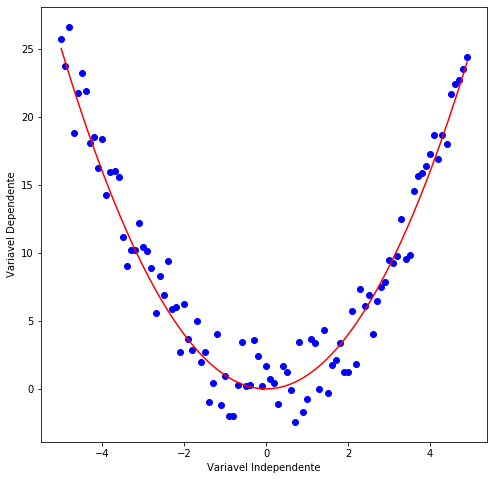

In [8]:
plt.figure(figsize=(8,8))
x = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e interceptar para verificar as alterações no gráfico.

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

# Exponential

    Uma função exponencial com base c é definida por
                𝑌 = 𝑎 + 𝑏𝑐𝑋
 
    onde b ≠ 0, c> 0, c ≠ 1 e x é qualquer número real. A base, c, é constante e o expoente, x, é uma variável.

Text(0.5, 0, 'Variavel Independente')

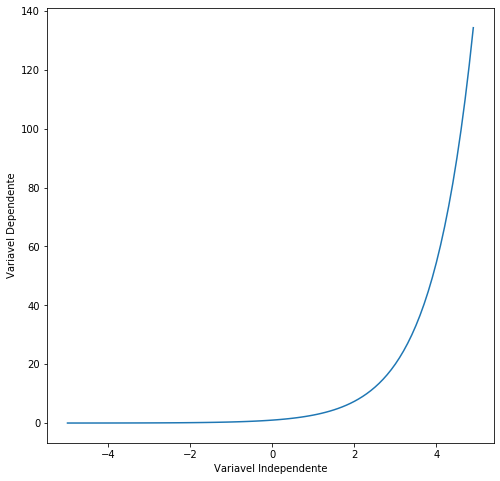

In [9]:
plt.figure(figsize=(8,8))
X = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e interceptar para verificar as alterações no gráfico

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

# Logarítmica

    A resposta 𝑦 é o resultado da aplicação do mapa logarítmico da entrada to na variável de saída 𝑦. É uma das formas mais simples de log (): ou seja,
        𝑦 = log (𝑥)
 
    Por favor, considere que, em vez de 𝑥, podemos usar 𝑋, que pode ser uma representação polinomial dos 𝑥 's. Em geral, seria escrito como
    𝑦 = log (𝑋)

/home/alana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


Text(0.5, 0, 'Variavel Dependente')

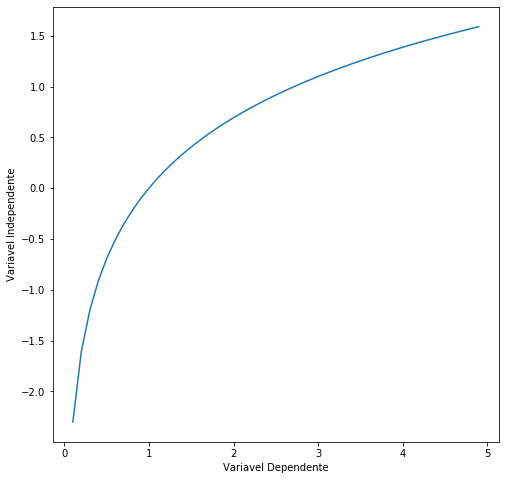

In [10]:
plt.figure(figsize=(8,8))
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Variavel Independente')
plt.xlabel('Variavel Dependente')

# Sigmoidal/Logistic

Text(0.5, 0, 'Variavel Independente')

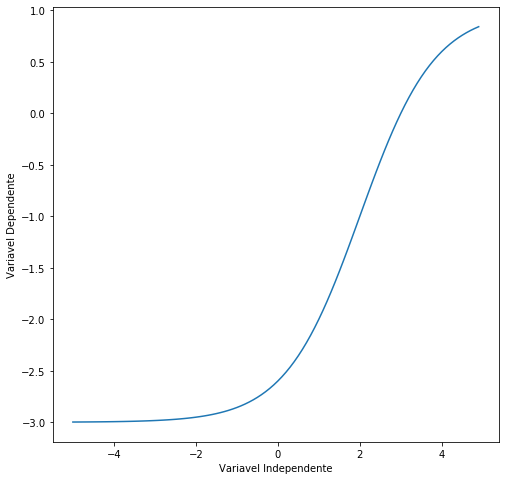

In [11]:
plt.figure(figsize=(8,8))
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

# Exemplo de regressão não linear

    Por exemplo, tentaremos ajustar um modelo não linear aos pontos de dados correspondentes ao PIB da China de 1960 a 2014. Fazemos download de um conjunto de dados com duas colunas, a primeira, um ano entre 1960 e 2014, a segunda, Renda interna bruta anual correspondente da China em dólares americanos para esse ano.

Imports Necessários

In [14]:
import numpy as np
import pandas as pd

Import Data

In [ ]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

In [15]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


# Plotando o conjunto de dados
    É assim que os pontos de dados se parecem. Parece uma função logística ou exponencial. O crescimento começa lento e, a partir de 2005, o crescimento é muito significativo. E, finalmente, desacelerou um pouco nos anos 2010.

Text(0.5, 0, 'Year')

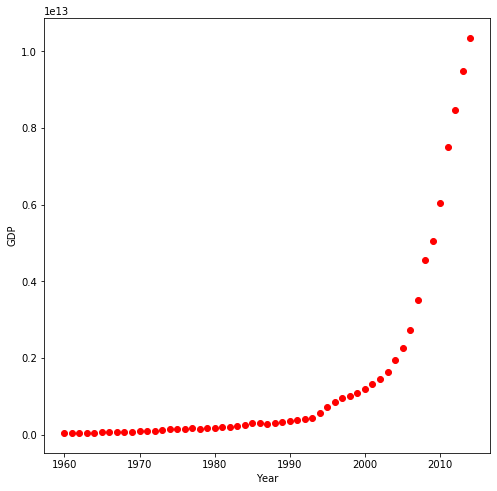

In [17]:
plt.figure(figsize=(8,8))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

# Escolhendo um modelo
    A partir de uma análise inicial do gráfico, determinamos que a função logística poderia ser uma boa aproximação, pois tem a propriedade de começar com um crescimento lento, aumentar o crescimento no meio e depois diminuir novamente no final; como ilustrado abaixo:

Text(0.5, 0, 'Variavel Independente')

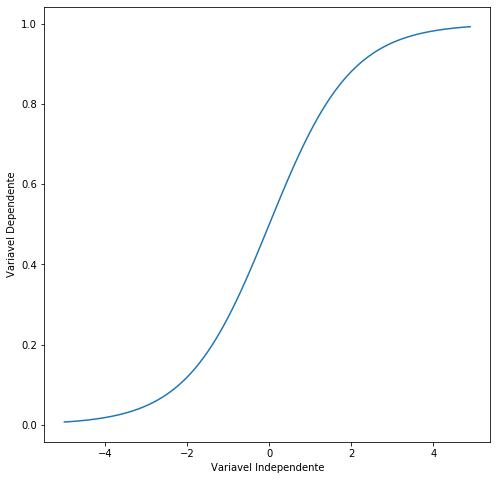

In [19]:
plt.figure(figsize=(8,8))
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Variavel Dependente')
plt.xlabel('Variavel Independente')

# Construindo o modelo
    Agora, vamos construir nosso modelo de regressão e inicializar seus parâmetros.

In [20]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

    Vamos analisar uma linha sigmóide de exemplo que pode se encaixar nos dados:

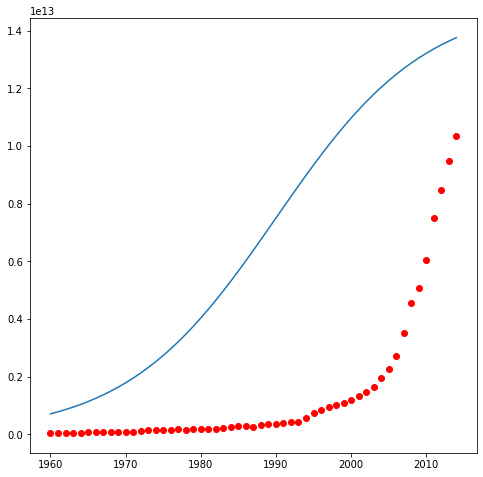

In [22]:
beta_1 = 0.10
beta_2 = 1990.0

#função logística
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot previsão inicial contra pontos de dados
plt.figure(figsize=(8,8))
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

    Nossa tarefa aqui é encontrar os melhores parâmetros para o nosso modelo. Vamos primeiro normalizar nosso x e y:

In [23]:
# Normalizando os dados
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

    Como encontramos os melhores parâmetros para a nossa linha de ajuste?
    podemos usar o curve_fit que usa mínimos quadrados não lineares para ajustar nossa função sigmóide aos dados. Valores ótimos para os parâmetros para que a soma dos resíduos quadrados do sigmóide (xdata, * popt) - ydata seja minimizada.
    
    popt são nossos parâmetros otimizados.

In [24]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#imprima os parâmetros finais
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


    Agora, plotamos nosso modelo de regressão resultante.

Text(0.5, 0, 'Year')

<Figure size 576x576 with 0 Axes>

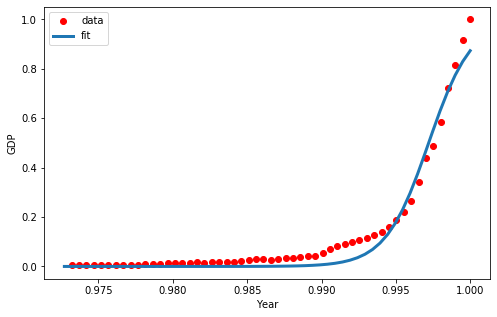

In [26]:
plt.figure(figsize=(8,8))
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')